In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv('수도권_인구_지하철_데이터.csv', header=None, encoding='cp949', dtype=str)
df.columns = ['시/구','동','행정동코드','법정동코드',
              '2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023',
              '지하철 유무','역명','개통 시기']
df

,시/구,동,행정동코드,법정동코드,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,지하철 유무,역명,개통 시기
0,종로구,사직동,1111053000,1111010600,10327,10132,10033,10013,9717,9818,9815,9806,9636,9355,9273,yes,경복궁,0
1,종로구,삼청동,1111054000,1111013900,3367,3268,3174,3118,3097,3073,2997,2909,2739,2642,2457,yes,안국,0
2,종로구,부암동,1111055000,1111018400,11469,11356,11217,11044,10726,10537,10551,10333,9782,9536,9389,no,-1,-1
3,종로구,평창동,1111056000,1111018200,19779,19595,19414,19457,19163,19105,18816,18582,18329,17858,17578,no,-1,-1
4,종로구,무악동,1111057000,1111018700,8626,8445,8619,8516,8375,8260,8740,8592,8297,8052,7991,no,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,연천군,미산면,4180034000,4180034000,1758,1775,1776,1777,1788,1797,1793,1808,1776,1748,1746,no,-1,-1
939,연천군,왕징면,4180035000,4180035000,1155,1136,1115,1120,1109,1069,1059,1036,1015,1008,1003,no,-1,-1
940,연천군,신서면,4180036000,4180036000,3287,3227,3310,3139,3000,2933,2897,2798,2731,2665,2534,no,-1,-1
941,연천군,중면,4180037000,4180037000,258,232,240,229,215,213,206,204,196,180,166,no,-1,-1


### '동'별 인구 증감률 계산

In [3]:
# 연도별 인구 데이터를 숫자형으로 변환
years = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
df[years] = df[years].apply(pd.to_numeric)

# 연도별 증감률을 계산하고 평균 증감률을 동별로 계산
def calculate_avg_growth_rate(row):
    growth_rates = []
    for i in range(len(years)-1):
        previous_year = row[years[i]]
        current_year = row[years[i+1]]
        if previous_year != 0:  # 이전 해 인구수가 0이 아닐 때만 계산
            growth_rate = (current_year - previous_year) / previous_year
            growth_rates.append(growth_rate)
    return np.mean(growth_rates) if growth_rates else None  # 증감률 리스트가 비어있지 않다면 평균 반환

# 각 동별로 평균 증감률 계산
df['평균 인구 증감률'] = df.apply(calculate_avg_growth_rate, axis=1)

# 결과 확인
df[['시/구','동', '평균 인구 증감률']]

,시/구,동,평균 인구 증감률
0,종로구,사직동,-0.010630
1,종로구,삼청동,-0.030827
2,종로구,부암동,-0.019715
3,종로구,평창동,-0.011702
4,종로구,무악동,-0.007288
...,...,...,...
938,연천군,미산면,-0.000645
939,연천군,왕징면,-0.013954
940,연천군,신서면,-0.025453
941,연천군,중면,-0.042376


In [4]:
df[df['시/구'] == '화성시'].tail(7)

,시/구,동,행정동코드,법정동코드,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,지하철 유무,역명,개통 시기,평균 인구 증감률
590,화성시,동탄3동,4159058700,4159011800,42376,44579,44254,44506,44117,43527,42146,42450,42036,41962,41153,no,-1,-1,-0.002703
591,화성시,동탄4동,4159058800,4159013000,4809,5589,46358,72129,91849,54630,53812,53557,52743,53208,53566,no,-1,-1,0.786143
592,화성시,동탄5동,4159059000,4159013100,1,1,3795,6951,20119,35914,37486,41438,45495,46944,47343,no,-1,-1,379.779855
593,화성시,동탄6동,4159060000,4159012900,1,1,1,1,1,72309,29193,31592,38804,42116,43973,no,-1,-1,7230.784363
594,화성시,동탄7동,4159061000,4159013500,1,1,1,1,1,1,72798,84524,86393,90972,57321,no,-1,-1,7279.686628
595,화성시,동탄8동,4159062000,4159013600,1,1,1,1,1,1,20534,27987,32177,33409,33822,no,-1,-1,2053.356332
596,화성시,동탄9동,4159063000,4159013300,1,1,1,1,1,1,1,1,1,1,39996,no,-1,-1,3999.500000


In [5]:
# IQR을 사용한 이상치 제거
Q1 = df['평균 인구 증감률'].quantile(0.25)
Q3 = df['평균 인구 증감률'].quantile(0.75)
IQR = Q3 - Q1

# IQR 규칙을 사용하여 이상치를 필터링하고, copy()를 사용하여 복사본을 생성
filtered_df = df[~((df['평균 인구 증감률'] < (Q1 - 1.5 * IQR)) | (df['평균 인구 증감률'] > (Q3 + 1.5 * IQR)))]

# 필터링 된 데이터 출력
filtered_df[['시/구', '동', '평균 인구 증감률']]

,시/구,동,평균 인구 증감률
0,종로구,사직동,-0.010630
1,종로구,삼청동,-0.030827
2,종로구,부암동,-0.019715
3,종로구,평창동,-0.011702
4,종로구,무악동,-0.007288
...,...,...,...
938,연천군,미산면,-0.000645
939,연천군,왕징면,-0.013954
940,연천군,신서면,-0.025453
941,연천군,중면,-0.042376


In [6]:
filtered_df[filtered_df['시/구'] == '화성시'].tail(7)

,시/구,동,행정동코드,법정동코드,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,지하철 유무,역명,개통 시기,평균 인구 증감률
583,화성시,병점1동,4159053000,4159011700,28533,29442,28926,29223,29608,29123,28801,29028,36627,37420,37058,no,-1,-1,0.029198
584,화성시,병점2동,4159054000,4159011700,27668,27671,27082,26859,26319,25625,24856,24701,24102,23681,23129,no,-1,-1,-0.017716
586,화성시,기배동,4159056000,4159012300,15387,15423,15184,15046,14808,14421,14115,13901,13775,16521,16339,no,-1,-1,0.007869
587,화성시,화산동,4159057000,4159012200,24918,24943,24333,24317,25325,25200,24392,23973,23620,24541,28025,no,-1,-1,0.012940
588,화성시,동탄1동,4159058500,4159012000,53173,54688,53679,54560,54200,52779,51201,52241,51713,51710,51153,no,-1,-1,-0.003688
589,화성시,동탄2동,4159058600,4159012700,35827,37378,36915,37949,37527,36975,35975,36143,35384,34942,34611,no,-1,-1,-0.003225
590,화성시,동탄3동,4159058700,4159011800,42376,44579,44254,44506,44117,43527,42146,42450,42036,41962,41153,no,-1,-1,-0.002703


### 개통 시기별 (일반적)인구 증감률 계산

In [7]:
# 개통 시기별로 그룹화하고 각 그룹의 평균 인구 증감률을 계산
grouped_by_opening = filtered_df.groupby('개통 시기')
avg_growth_by_opening = grouped_by_opening['평균 인구 증감률'].mean()

# 결과 출력
print(avg_growth_by_opening)

개통 시기
-1   -0.005589
0    -0.009222
1    -0.002989
2    -0.004762
Name: 평균 인구 증감률, dtype: float64


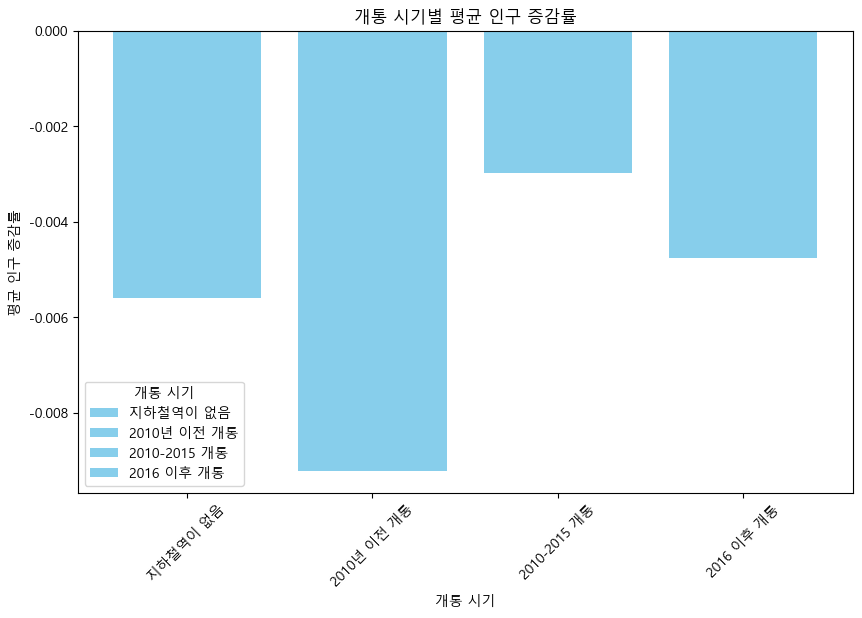

In [8]:
# 개통 시기별 설명을 위한 매핑 (문자열로 키를 변경)
opening_labels = {
    '-1': '지하철역이 없음',
    '0': '2010년 이전 개통',
    '1': '2010-2015 개통',
    '2': '2016 이후 개통'
}
# 한글 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 시각화
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(avg_growth_by_opening.index.map(lambda x: opening_labels[str(x)]), avg_growth_by_opening.values, color='skyblue')
ax.set_title('개통 시기별 평균 인구 증감률')
ax.set_xlabel('개통 시기')
ax.set_ylabel('평균 인구 증감률')
plt.xticks(rotation=45)

# 범례 추가
labels = [opening_labels[str(key)] for key in sorted(avg_growth_by_opening.index.unique())]
ax.legend(bars, labels, title="개통 시기")

plt.show()

### 지하철 개통 연도에 따른 전/후 인구 증감률

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 필요한 열 선택
df = pd.read_csv('수도권_인구_지하철_데이터.csv', header=None, encoding='cp949', dtype=str)
df.columns = ['시/구','동','행정동코드','법정동코드',
              '2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023',
              '지하철 유무','역명','개통 시기']

df['개통 시기'] = df['개통 시기'].astype(int)
years = [str(year) for year in range(2013, 2024)]
df[years] = df[years].replace(',', '', regex=True).astype(int)

# 인구가 0인 행을 제거
df = df[~df[years].eq(0).any(axis=1)]

In [10]:
# 증감률 계산 함수
def calculate_yearly_growth(row):
    return [(row[years[i]] - row[years[i - 1]]) / row[years[i - 1]] for i in range(1, len(years))]

# 이상치 제거 함수
def remove_outliers(data):
    data = np.array(data)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [11]:
# 각 개통 시기별 증감률 계산 및 이상치 제거
growth_rates = {'-1': [], '0': [], '1': [], '2': []}
for _, row in df.iterrows():
    opening = str(row['개통 시기'])
    if opening in growth_rates:
        yearly_growth = calculate_yearly_growth(row)
        cleaned_growth = remove_outliers(yearly_growth)
        if len(cleaned_growth) == len(years) - 1:
            growth_rates[opening].append(cleaned_growth)

# 평균 증감률 계산
average_growth_rates = {k: np.mean(v, axis=0) if v else [0] * (len(years) - 1) for k, v in growth_rates.items()}

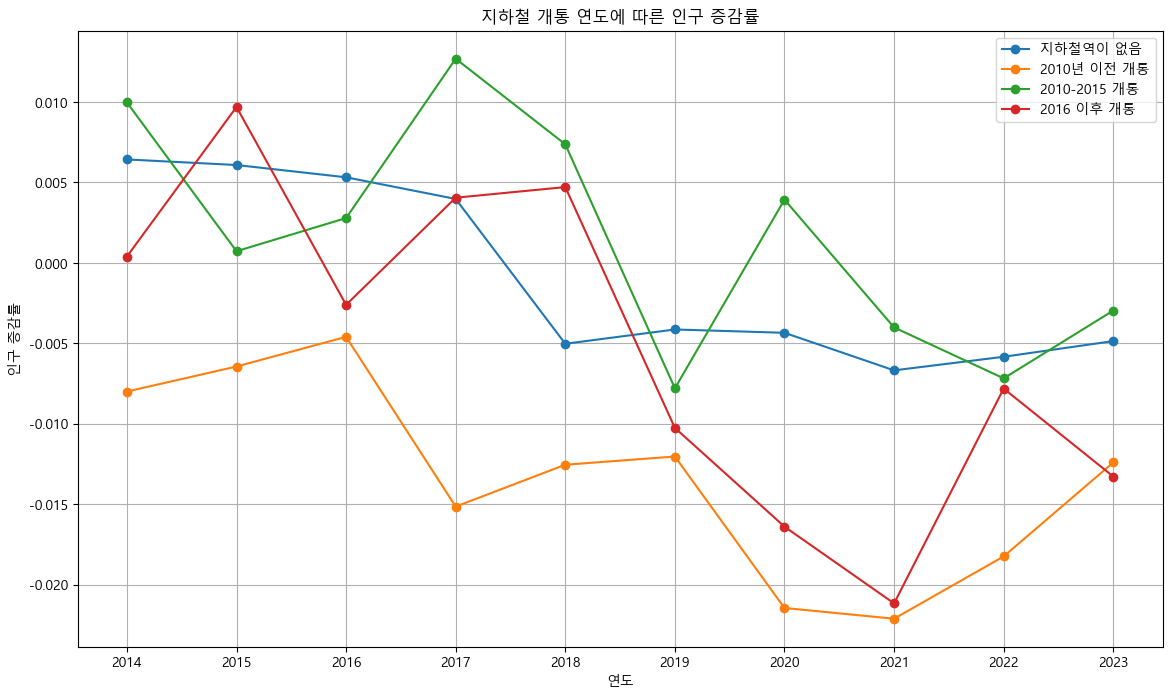

In [12]:
# 시각화
plt.figure(figsize=(14, 8))
x_axis = [str(year) for year in range(2014, 2024)]  # 2013년과 2014년의 증감률부터 시작

for k, v in average_growth_rates.items():
    if k == '-1':
        label = '지하철역이 없음'
    elif k == '0':
        label = '2010년 이전 개통'
    elif k == '1':
        label = '2010-2015 개통'
    elif k == '2':
        label = '2016 이후 개통'
    
    plt.plot(x_axis, v, marker='o', label=label)

plt.title('지하철 개통 연도에 따른 인구 증감률')
plt.xlabel('연도')
plt.ylabel('인구 증감률')
plt.legend()
plt.grid(True)
plt.show()

그래프가 해석하기 어려운 형태이다. 부연 설명이 많이 필요하다.말을 잘 갖다 붙이자. <br>
16년 이후 개통 


ex)
2016년도 이후 개통 : 2016년도, 2021년도에 영향을 줄 만한 연도에 개통한 지역만 따로 뽑아서 보여주자.<br>
2010-2015년 개통 : 2016년도 상승(ok), 2019년에 상승(지하철 개통 후 지역 경제 활성화에 따른 인구 증가)

2010-2015년 개통된 지하철역 주변의 인구 증감률이 2019년에 상승 곡선을 그리는 현상이 의외로 보일 수 있습니다. 이러한 현상은 여러 가지 요인에 의해 발생할 수 있습니다. 몇 가지 가능성을 고려해 볼 수 있습니다:

지하철 개통 효과: 지하철 개통 이후 몇 년간은 교통 접근성이 향상됨에 따라 해당 지역의 인구가 꾸준히 증가할 수 있습니다. 2019년에는 이러한 효과가 누적되어 인구 증감률이 상승했을 가능성이 있습니다.
개발 및 재개발 프로젝트: 2019년을 전후로 해당 지역에서 대규모 개발 프로젝트나 재개발이 진행된 경우, 새로 유입된 인구가 증가했을 수 있습니다. 특히, 신규 아파트 단지나 상업 지구의 개발이 인구 증가에 영향을 미쳤을 가능성이 있습니다.
정책 변화: 정부나 지방자치단체의 정책 변화로 인해 해당 지역의 인구 유입이 촉진되었을 수 있습니다. 예를 들어, 주거지 지원 정책이나 세제 혜택 등이 있을 수 있습니다.
데이터의 특이점: 특정 연도에 데이터 수집 방식이나 범위의 변화가 있을 경우, 데이터 자체의 특이점으로 인해 인구 증감률이 일시적으로 상승한 것처럼 보일 수 있습니다.
경제적 요인: 지역 경제가 활성화되거나 일자리 기회가 증가하면, 해당 지역으로의 인구 이동이 활발해질 수 있습니다.
이러한 요인들을 종합적으로 고려할 때, 2019년에 해당 지역의 인구 증감률이 상승 곡선을 그린 이유를 더 잘 이해할 수 있습니다. 보다 구체적인 분석을 위해서는 해당 연도의 지역별 개발 현황, 정책 변화, 경제적 요인 등을 함께 살펴보는 것이 좋습니다.

In [14]:
# 2016년 개통한 상현역 
df_station_sanghyun = df[df['역명'] == '상현']
df_station_sanghyun

,시/구,동,행정동코드,법정동코드,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,지하철 유무,역명,개통 시기
481,용인시,상현1동,4146557000,4146510700,76485,76873,76945,77477,78126,77731,78521,78461,105641,105099,105359,yes,상현,2


In [15]:
# 상현동에 대한 인구 데이터 추출 및 증감률 계산
years = [str(year) for year in range(2013, 2024)]
sanghyun_population = df_station_sanghyun[years].iloc[0].astype(int)

# 연도별 인구 증감률 계산
sanghyun_growth_rates = [(sanghyun_population[i] - sanghyun_population[i-1]) / sanghyun_population[i-1] * 100 
                         for i in range(1, len(sanghyun_population))]

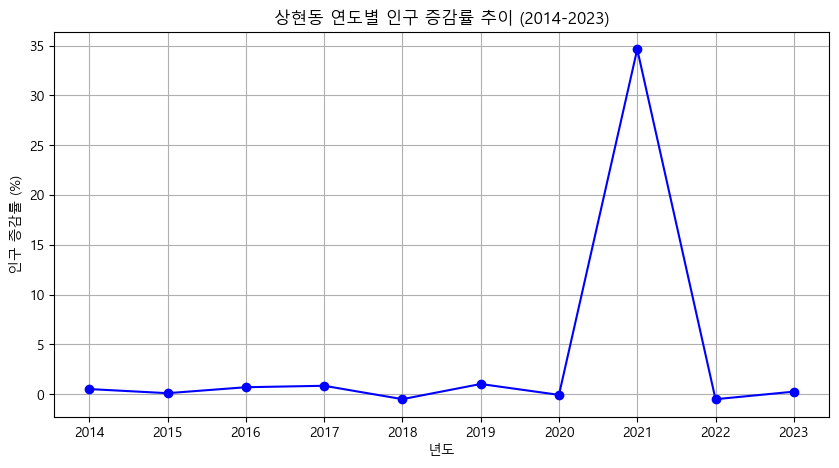

In [17]:
import matplotlib.pyplot as plt

# 위에서 계산한 인구 증감률을 다시 시각화
plt.figure(figsize=(10, 5))
plt.plot(years[1:], sanghyun_growth_rates, marker='o', linestyle='-', color='b')
plt.title('상현동 연도별 인구 증감률 추이 (2014-2023)')
plt.xlabel('년도')
plt.ylabel('인구 증감률 (%)')
plt.grid(True)
plt.show()
